In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Sử dụng Python
-  Cho đoạn text lấy từ trang web tuổi trẻ
- 2.1 MapReduce (viết hàm)
- 2.2 Trực quan hóa dữ liệu
- 2.3 Lưu MapReduce xuống file

In [ ]:
import requests
from bs4 import BeautifulSoup
from collections import Counter
import matplotlib.pyplot as plt
import json

In [ ]:
# Dữ liệu được lấy trực tiếp từ trang web "https://tuoitre.vn"
# ví dụ: Lấy từ bài báo: Vụ Vạn Thịnh Phát: Bà Trương Mỹ Lan nói tiền của mình đã cho rồi thì không nhớ

url = 'https://tuoitre.vn/vu-van-thinh-phat-ba-truong-my-lan-noi-tien-cua-minh-da-cho-roi-thi-khong-nho-20240313110146467.htm'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
# Lấy text từ các thẻ p hoặc h2 trong trang web
text = ' '.join([p.text for p in soup.find_all(['p', 'h2'])])

In [ ]:
text

'\r\n            Sáng 13-3, phiên tòa xét xử bà Trương Mỹ Lan và các đồng phạm vụ Vạn Thịnh Phát tiếp tục với phần xét hỏi của các luật sư.\r\n         Các bị cáo tại phiên tòa  sáng 13-3 - Ảnh: HỮU HẠNH Tại phiên tòa sáng nay, các luật sư tập trung hỏi bị cáo Trương Mỹ Lan và các cựu cán bộ Ngân hàng SCB về thủ đoạn cho vay và đảo nợ tại ngân hàng này.  Qua đó, bị cáo Lan khẳng định hàng chục tỉ đồng đã cho thì không nhớ đến nữa. Đọc thêm về vụ án Vạn Thịnh Phát TẠI ĐÂY Hầu hết khoản vay tại SCB là vay để đảo nợ Trả lời luật sư bào chữa cho mình, bà Trần Thị Mỹ Dung (nguyên phó tổng giám đốc Ngân hàng SCB) cho biết khoản vay đã cơ cấu là khoản vay đã tới thời hạn trả nhưng không trả thì được cơ cấu khoảng thời gian dài hơn, gồm cơ cấu cả gốc và lãi hoặc cơ cấu gốc trả lãi. Thực tế hầu như tại SCB là khoản vay ngắn hạn, khi tới hạn chỉ có 2 phương pháp là trả vào hoặc cơ cấu. Trả vào là có khoản vay mới để đáo hạn khoản vay cũ. Khoản vay mới thì dòng tiền không đi ra ngoài, mà để

In [ ]:
def map_reduce(text):
    words = text.split()
    word_count = Counter(words)
    return word_count

word_count = map_reduce(text.lower())


word_count = map_reduce(text)

In [ ]:
word_count

Counter({'Sáng': 2,
         '13-3,': 2,
         'phiên': 4,
         'tòa': 4,
         'xét': 9,
         'xử': 3,
         'bà': 18,
         'Trương': 7,
         'Mỹ': 6,
         'Lan': 16,
         'và': 20,
         'các': 13,
         'đồng': 6,
         'phạm': 1,
         'vụ': 5,
         'Vạn': 3,
         'Thịnh': 3,
         'Phát': 4,
         'tiếp': 5,
         'tục': 4,
         'với': 11,
         'phần': 10,
         'hỏi': 11,
         'của': 15,
         'luật': 7,
         'sư.': 2,
         'Các': 1,
         'bị': 1,
         'cáo': 1,
         'tại': 1,
         'phiên': 1,
         'tòa': 1,
         'sáng': 2,
         '13-3': 1,
         '-': 9,
         'Ảnh:': 1,
         'HỮU': 1,
         'HẠNH': 1,
         'Tại': 1,
         'nay,': 2,
         'sư': 8,
         'tập': 3,
         'trung': 2,
         'bị': 12,
         'cáo': 15,
         'cựu': 1,
         'cán': 1,
         'bộ': 3,
         'Ngân': 4,
         'hàng': 6,
         'SCB': 6,

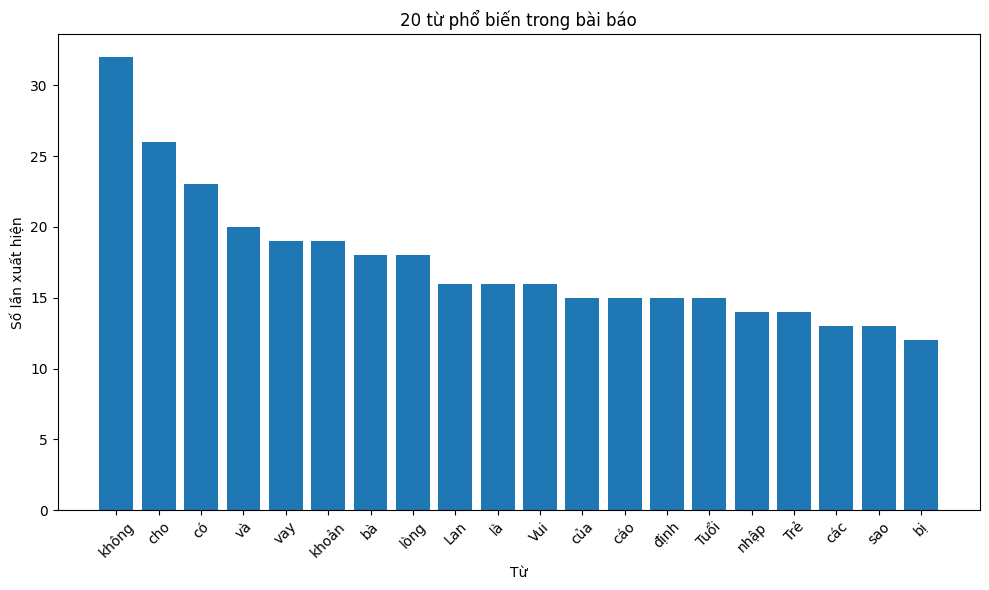

In [ ]:
def visualize_data(word_count):
    top_words = word_count.most_common(20)
    words, counts = zip(*top_words)

    plt.figure(figsize=(10, 6))
    plt.bar(words, counts)
    plt.title('20 từ phổ biến trong bài báo')
    plt.xlabel('Từ')
    plt.ylabel('Số lần xuất hiện')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

visualize_data(word_count)

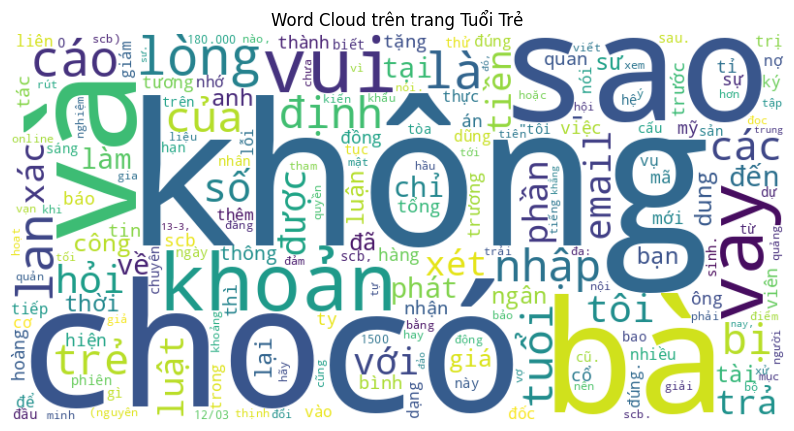

In [ ]:
from wordcloud import WordCloud

def visualize_word_cloud(word_count):
    # Tạo Word Cloud từ từ điển word_count
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_count)

    # Hiển thị Word Cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud trên trang Tuổi Trẻ')
    plt.show()

visualize_word_cloud(word_count)

In [ ]:
def save_map_reduce_result_to_txt(word_count, filename='word_count.txt'):
    with open(filename, 'w') as f:
        for word, count in word_count.items():
            f.write(f"{word}: {count}\n")

save_map_reduce_result_to_txt(word_count,filename='/content/drive/MyDrive/word_count.txt')